In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
satellite_view=cv2.imread('task3.jpg')

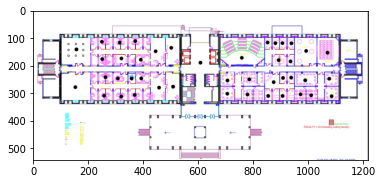

In [3]:
plt.imshow(satellite_view)

In [6]:
satellite_view_cord = []
cam_view_cord = [] 
def satellite_on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        satellite_view_cord.append((x, y))
        cv2.circle(satellite_view, (x, y), 1, (0, 0, 255), thickness=-1)
        cv2.putText(satellite_view, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    1.0, (0, 0, 0), thickness=1)
        cv2.imshow("satellite-view", satellite_view)
        print("satellite-view",x,y)
        
        
def cam_view_on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        cam_view_cord.append((x, y))
        cv2.circle(img, (x, y), 1, (0, 0, 255), thickness=-1)
        cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    1.0, (0, 0, 0), thickness=1)
        cv2.imshow("cam-view", img)
        print("cam view",x,y) 
        
        
        
def getCoordinates(img,satellite_view):  
    cv2.namedWindow("satellite-view")
    cv2.setMouseCallback("satellite-view", satellite_on_EVENT_LBUTTONDOWN)
    cv2.imshow("satellite-view", satellite_view)
    
    cv2.namedWindow("cam-view")
    cv2.setMouseCallback("cam-view", cam_view_on_EVENT_LBUTTONDOWN)
    cv2.imshow("cam-view", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [15]:
satellite_view_cord = []
cam_view_cord = []
satellite_view=cv2.imread('task3.jpg')
#img_top = cv2.resize(img_top, (700, 700)) 
img=cv2.imread('1.jpg')
#img=cv2.resize(img, (700, 700)) 
getCoordinates(img,satellite_view)

cam view 81 5
satellite-view 594 335
cam view 1074 6
satellite-view 594 293
cam view 1077 711
satellite-view 641 291
cam view 82 713
satellite-view 641 335


In [16]:
target_points_cam1,img_points_cam1=satellite_view_cord,cam_view_cord

In [17]:
Hm_cam1=cv2.findHomography(np.array(img_points_cam1),np.array(target_points_cam1))[0]
np.save('H1', Hm_cam1)
Hm_cam1

array([[-2.55680947e-03,  2.69690071e-02,  5.93687905e+02],
       [-4.34958332e-02, -2.05171975e-02,  3.38408985e+02],
       [-4.19681481e-06, -6.14228253e-05,  1.00000000e+00]])

In [18]:
img=cv2.imread('1.jpg')
#img=cv2.resize(img, (700, 400)) 
img_output1 = cv2.warpPerspective(img, Hm_cam1, (satellite_view.shape[1],satellite_view.shape[0]))
cv2.imshow("OUTPUT", img_output1)
cv2.waitKey(0)
cv2.destroyAllWindows()